# Worksheet 15

Name:  Zeming Chen

UID: U98986406

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

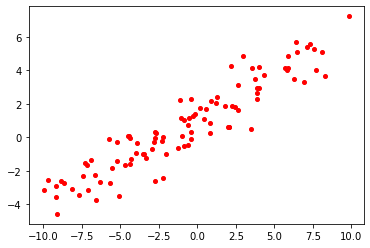

In [1]:
import numpy as np
import matplotlib.pyplot as plt

line = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
ylin = line[0]+(line[1]*xlin)+np.random.randn(100)
plt.plot(xlin,ylin,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

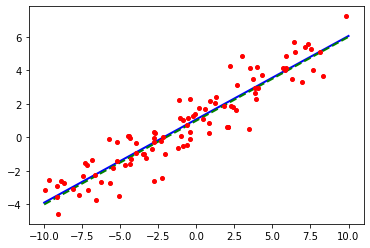

In [3]:
intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta_est = np.linalg.inv(X.T@X)@X.T@ylin

xplot = np.linspace(-10,10,50)
yestplot = beta_est[0] + beta_est[1] * xplot
y_true = line[0] + line[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xplot, y_true,'g--',lw=2)
plt.plot(xlin, ylin,'ro',markersize=4)
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

It looks pretty similar to the parameters we used.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

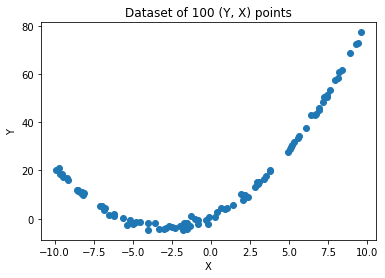

In [4]:
X = np.random.uniform(low=-10, high=10, size=100)
eps = np.random.normal(loc=0, scale=1, size=100)
Y = 1 + 3*X + 0.5*X**2 + eps

# Plot the dataset
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset of 100 (Y, X) points')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

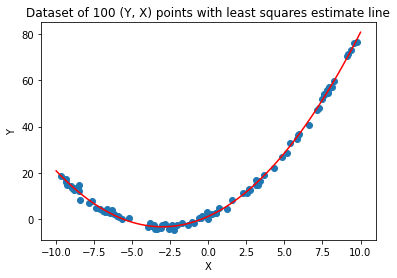

In [7]:
X = np.random.uniform(low=-10, high=10, size=100)
eps = np.random.normal(loc=0, scale=1, size=100)
Y = 1 + 3*X + 0.5*X**2 + eps
coefficients = np.polyfit(X, Y, 2)
line = np.poly1d(coefficients)
line_X = np.linspace(start=-10, stop=10, num=100)

plt.scatter(X, Y)
plt.plot(line_X, line(line_X), c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset of 100 (Y, X) points with least squares estimate line')
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

Still, it looks pretty similar

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

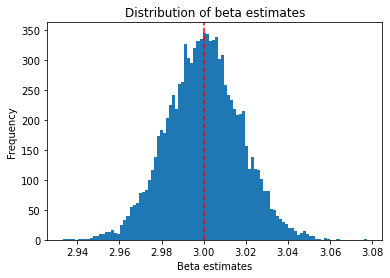

In [9]:
import numpy as np
import matplotlib.pyplot as plt

true_beta = np.array([1, 3, 0.5])
betas = []

for _ in range(10000):
    xlin = -10.0 + 20.0 * np.random.random(100)
    eps = np.random.normal(loc=0, scale=1, size=100)
    ylin = true_beta[0] + true_beta[1]*xlin + true_beta[2]*xlin**2 + eps
    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin, xlin**2]).T
    beta_hat = np.linalg.lstsq(X, ylin, rcond=None)[0]
    betas.append(beta_hat)

betas = np.array(betas)

plt.hist(betas[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.xlabel('Beta estimates')
plt.ylabel('Frequency')
plt.title('Distribution of beta estimates')
plt.show()